# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Saba Nasiri
2.   Student Number: 98101052


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/saba-200979/DL-HW1/main/P3/data01.csv")
dataset
# implement the split part
# name them: x_train, x_test, y_train, y_test

x_train = dataset[:int(len(dataset)*0.8)]['X']
y_train = dataset[:int(len(dataset)*0.8)]['Y']

x_test = dataset[int(len(dataset)*0.8):]['X']
y_test = dataset[int(len(dataset)*0.8):]['Y']


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
x1=np.array(x_train)
x1=np.reshape(x1,(-1,1))
x2=np.ones(len(x1))
x2=np.reshape(x2,(-1,1))
A=np.concatenate((x1, x2), axis=1)
a=np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)
m=np.dot(a,y_train)
m


array([-1.02641738,  0.81500634])

In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error =mean_squared_error(y_train,predicted_train_y) 
test_error = mean_squared_error(y_test,predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.32467763017774226
MSE test error: 0.3544951192130029


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

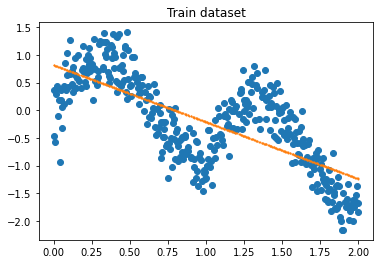

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

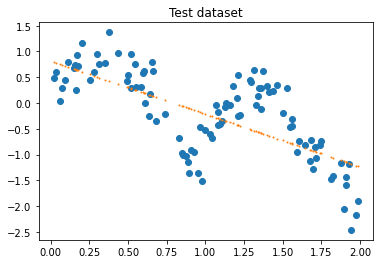

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.


Were the reported accuracies acceptable?

No,the accuracy is too low for this dataset.the output is between -2.5 and 1.5 and MSE is almost 0.3 which is too much for this data range.

What about the line you drew in the last part?

The line can not fit the data very well.

Was it appropriate for the dataset?

No,it's not appropriate.

Explain what are the main problems here.

 the relation between x and y is non linear, but we're trying to estimate the relation with a linear function, which will make a huge error and very little accuracy.Also, the varience of the dataset is too much, which make the MSE of the linear approximation too high.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes, locally Weighted Linear Regression will approximate the dataset with a piecewise linear function and this help us to fit x,y better in different rigions of the data.

In Locally weighted linear regression, we give the model the x where we want to make the prediction, then the model gives all the x(i) 's around that x a higher weight close to one, and the rest of x(i) 's get a lower weight close to zero and then tries to fit a straight line to that weighted x(i) 's data.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
  l = train_dataset.shape[0]
  W = np.mat(np.eye(l))
  #print(W.shape)
  for i, xi in enumerate(train_dataset):
    W[i, i] = np.exp(-np.dot((xi-the_query_point),(xi-the_query_point).T)/(2*hyperparameter*hyperparameter))
  return W
 


Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [8]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    x3=np.array(train_X)
    x4=np.reshape(x3,(-1,1))
    X = np.concatenate((x4, np.ones((l,1))),axis=1)
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    a=np.dot(X.T,W)
    b=np.linalg.inv(np.dot(a,X))
    d=np.dot(a,train_Y).T
    theta = np.dot(b,d)
    return np.dot(qx, theta)


### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [9]:
hyperparameter=0.1
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
predicted_test= np.reshape( np.array(predicted_test) , (1,100) ) 
predicted_test= np.reshape( predicted_test , (100,) )
error = mean_squared_error(predicted_test,y_test)
print(error)


0.10590729682860234


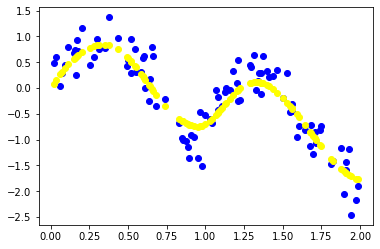

In [10]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes, in this model we approximate the y around each x with the inputs which are nearer to x and these inputs will have higher weight, so the estimated y will be more accuarate and the farther xs which have much more different values will have less effect.It's like we're estimating ys based on a piecewise linear model.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

KNN will perform well too, because it will estimate ys based on k nearest neighbors of x and their corresponding values, which will decrease the effect of the farther xs that have much more different values and can increase the error of the model. 

### Part10:
Implementing the `KNN model`.

In [11]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance =  np.absolute(x1-x2)
        return distance

    def return_nn_ids(self, x):
      distancee = list()
      j=0
      for i in self.X:
        dist = self.distance(i, x)
        distancee.append([dist, j])
        j=j+1
      distancee=sorted(distancee,key=lambda l:l[0])
      #print(distancee)
      indices=list()
      for i in range(self.k):
        indices.append(distancee[i][1])
      
      return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        sum=0
        for i in neareest_indices:
          sum=sum+self.Y[i]

        predicted_y = sum/self.k
        return predicted_y




In [12]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(predicted_y,y_test)
    return error, predicted_y


In [20]:
k = 7
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09729109052277701


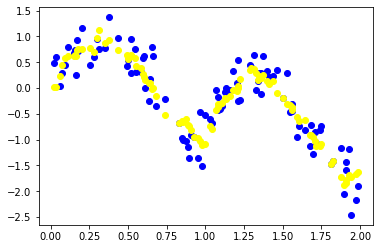

In [21]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes, MSE has been decreased and the accuaracy has been increased, and based on the plot, the model fit the data very well and it's a good estimator.You can change k to see different results, but k=7 performs very well on the dataset.